In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df=pd.read_csv('./fraud_oracle.csv')
df.head()
df.shape

(15420, 33)

In [9]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [11]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [12]:
print('Out of all % of records not commited fraud==> ',len(df[df['FraudFound_P']==0])/len(df)*100)
print('Out of all % of records commited fraud==> ',len(df[df['FraudFound_P']==1])/len(df)*100)

Out of all % of records not commited fraud==>  94.01426718547341
Out of all % of records commited fraud==>  5.985732814526589


In [13]:
from sklearn.utils import resample

oversamp=resample(df[df['FraudFound_P']==1],
                 replace=True,
                 n_samples=len(df[df['FraudFound_P']==0]),
                 random_state=30)
df1=pd.concat([oversamp, df[df['FraudFound_P']==0]])

In [8]:
df1.shape


(28994, 33)

In [14]:
print('Out of all % of records not commited fraud==> ',len(df1[df1['FraudFound_P']==0])/len(df1)*100)
print('Out of all % of records commited fraud==> ',len(df1[df1['FraudFound_P']==1])/len(df1)*100)

Out of all % of records not commited fraud==>  50.0
Out of all % of records commited fraud==>  50.0


In [15]:
df1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
13241,Jun,5,Friday,Chevrolet,Urban,Tuesday,Jul,1,Male,Single,...,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
6300,Sep,2,Sunday,Toyota,Urban,Monday,Sep,2,Male,Married,...,7 years,36 to 40,No,No,External,more than 5,4 to 8 years,2 vehicles,1995,Liability
13425,Jul,2,Monday,Toyota,Urban,Friday,Jul,4,Female,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,All Perils
7618,Oct,5,Monday,Honda,Rural,Wednesday,Nov,1,Male,Single,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,Collision
2167,Mar,3,Saturday,Toyota,Rural,Friday,Apr,1,Male,Married,...,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


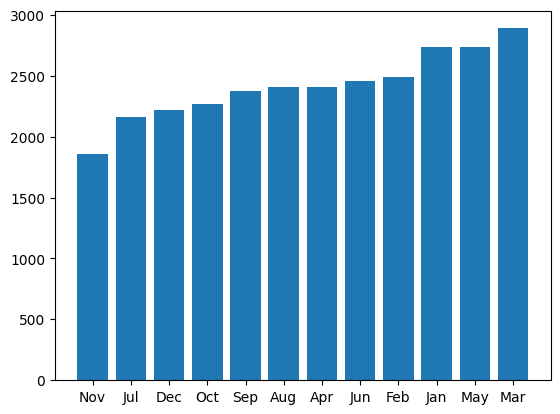

In [16]:
Months_list=['Nov','Jul','Dec','Oct','Sep','Aug','Apr','Jun','Feb','Jan','May','Mar']
plt.bar(Months_list,df1.groupby('Month').count()['FraudFound_P'].sort_values())
plt.show()

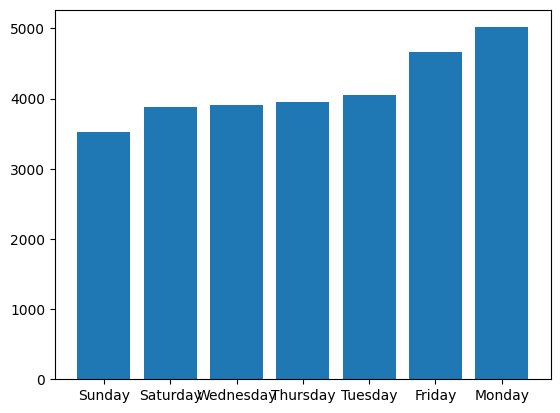

In [12]:
Days_list=[ 'Sunday', 'Saturday','Wednesday','Thursday','Tuesday', 'Friday', 'Monday']
plt.bar(Days_list,df1.groupby('DayOfWeek').count()['FraudFound_P'].sort_values())
plt.show()

In [17]:
pd.DataFrame(df1.groupby('Make').count()['FraudFound_P'].sort_values()).index

Index(['Lexus', 'Ferrari', 'Porche', 'Jaguar', 'Mecedes', 'BMW', 'Nisson',
       'Saturn', 'Dodge', 'Mercury', 'Saab', 'VW', 'Ford', 'Accura',
       'Chevrolet', 'Mazda', 'Honda', 'Toyota', 'Pontiac'],
      dtype='object', name='Make')

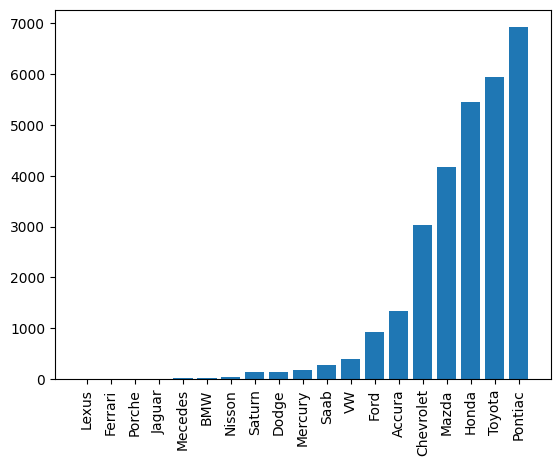

In [18]:
Make_list=['Lexus', 'Ferrari', 'Porche', 'Jaguar', 'Mecedes', 'BMW', 'Nisson',
       'Saturn', 'Dodge', 'Mercury', 'Saab', 'VW', 'Ford', 'Accura',
       'Chevrolet', 'Mazda', 'Honda', 'Toyota', 'Pontiac']
plt.bar(Make_list,df1.groupby('Make').count()['FraudFound_P'].sort_values())
plt.xticks(Make_list,rotation='vertical')
plt.show()

In [19]:
df1.groupby('Make').count()['FraudFound_P'].sort_values()

Make
Lexus           1
Ferrari         2
Porche          5
Jaguar          6
Mecedes        16
BMW            30
Nisson         44
Saturn        139
Dodge         140
Mercury       180
Saab          272
VW            387
Ford          936
Accura       1336
Chevrolet    3032
Mazda        4175
Honda        5442
Toyota       5932
Pontiac      6919
Name: FraudFound_P, dtype: int64

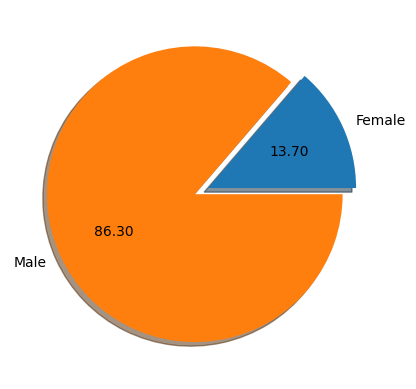

In [20]:
plt.pie(df1.groupby('Sex').count()['FraudFound_P'].sort_values(),labels=['Female','Male'],explode=[0.1,0],shadow=True,autopct='%.2f')
plt.show()

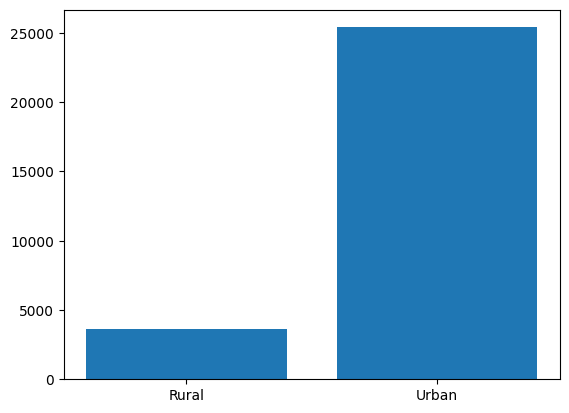

In [22]:
plt.bar(['Rural','Urban'],df1.groupby('AccidentArea').count()['FraudFound_P'].sort_values())
plt.show()

In [21]:
df1.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
13241,Jun,5,Friday,Chevrolet,Urban,Tuesday,Jul,1,Male,Single,...,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils
6300,Sep,2,Sunday,Toyota,Urban,Monday,Sep,2,Male,Married,...,7 years,36 to 40,No,No,External,more than 5,4 to 8 years,2 vehicles,1995,Liability
13425,Jul,2,Monday,Toyota,Urban,Friday,Jul,4,Female,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,All Perils
7618,Oct,5,Monday,Honda,Rural,Wednesday,Nov,1,Male,Single,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,Collision
2167,Mar,3,Saturday,Toyota,Rural,Friday,Apr,1,Male,Married,...,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [23]:
df1.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [25]:
df2=df1[['Make', 'AccidentArea','Sex','MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
         'VehiclePrice','Deductible', 'DriverRating','PastNumberOfClaims', 'AgeOfVehicle',
         'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType','NumberOfSuppliments', 
         'AddressChange_Claim', 'NumberOfCars', 'Year','BasePolicy','FraudFound_P']]

In [26]:
df2.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
13241,Chevrolet,Urban,Male,Single,30,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,400,...,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils,1
6300,Toyota,Urban,Male,Married,37,Policy Holder,Sedan - Liability,Sport,20000 to 29000,400,...,36 to 40,No,No,External,more than 5,4 to 8 years,2 vehicles,1995,Liability,1
13425,Toyota,Urban,Female,Married,30,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,400,...,31 to 35,No,No,External,none,no change,1 vehicle,1996,All Perils,1
7618,Honda,Rural,Male,Single,28,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,400,...,31 to 35,No,No,External,none,no change,1 vehicle,1995,Collision,1
2167,Toyota,Rural,Male,Married,55,Policy Holder,Sedan - All Perils,Sedan,less than 20000,400,...,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,1


In [27]:
df2['Make']=df2['Make'].replace({'Lexus':0, 'Ferrari':1, 'Porche':2, 'Jaguar':3, 'Mecedes':4, 'BMW':5, 'Nisson':6,
       'Saturn':7, 'Dodge':8, 'Mercury':9, 'Saab':10, 'VW':11, 'Ford':12, 'Accura':13, 
       'Chevrolet':14, 'Mazda':15, 'Honda':16, 'Toyota':17, 'Pontiac':18})

In [28]:
from sklearn.preprocessing import LabelEncoder
df2['Fault']=LabelEncoder().fit_transform(df2['Fault'])

In [44]:
df2.AccidentArea=LabelEncoder().fit_transform(df2['AccidentArea'])
df2.Sex=LabelEncoder().fit_transform(df2['Sex'])
df2.AccidentArea=LabelEncoder().fit_transform(df2['AccidentArea'])
df2.MaritalStatus=LabelEncoder().fit_transform(df2['MaritalStatus'])
df2.PolicyType=LabelEncoder().fit_transform(df2['PolicyType'])
df2.VehicleCategory=LabelEncoder().fit_transform(df2['VehicleCategory'])
df2.PoliceReportFiled=LabelEncoder().fit_transform(df2['PoliceReportFiled'])
df2.WitnessPresent=LabelEncoder().fit_transform(df2['WitnessPresent'])
df2.AgentType=LabelEncoder().fit_transform(df2['AgentType'])
df2.BasePolicy=LabelEncoder().fit_transform(df2['BasePolicy'])

In [43]:
df2.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,Deductible,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,FraudFound_P
13241,14,Urban,Male,Single,30,0,Sedan - All Perils,Sedan,24500.0,400,...,33.0,No,No,External,5,0,1.0,1996,All Perils,1
6300,17,Urban,Male,Married,37,0,Sedan - Liability,Sport,24500.0,400,...,38.0,No,No,External,5,48,2.0,1995,Liability,1
13425,17,Urban,Female,Married,30,0,Sedan - All Perils,Sedan,24500.0,400,...,33.0,No,No,External,0,0,1.0,1996,All Perils,1
7618,16,Rural,Male,Single,28,0,Sedan - Collision,Sedan,24500.0,400,...,33.0,No,No,External,0,0,1.0,1995,Collision,1
2167,17,Rural,Male,Married,55,0,Sedan - All Perils,Sedan,20000.0,400,...,46.0,No,No,External,35,0,1.0,1994,All Perils,1


In [29]:
df2.NumberOfSuppliments=df2['NumberOfSuppliments'].replace('none',0)
df2.NumberOfSuppliments=df2['NumberOfSuppliments'].str.replace('\D','',regex=True)
df2.NumberOfSuppliments=df2.NumberOfSuppliments.fillna(0)

In [30]:
df2.AddressChange_Claim=df2['AddressChange_Claim'].replace('no change',0)
df2.AddressChange_Claim=df2['AddressChange_Claim'].str.replace('\D','',regex=True)
df2.AddressChange_Claim=df2['AddressChange_Claim'].fillna(0)

In [31]:
df2.AgeOfVehicle=df2['AgeOfVehicle'].replace('new',1)
df2.AgeOfVehicle=df2['AgeOfVehicle'].str.replace('\D','',regex=True)
df2.AgeOfVehicle=df2['AgeOfVehicle'].fillna(1)

In [32]:
import re

def strcon(a):
    number=re.findall(r'\d+',a)
    if len(number)==2:
        return (int(number[0])+int(number[1]))/2
    elif len(number)==1:
        return int(number[0])
    else:
        return 0

In [33]:
df2.VehiclePrice=df2['VehiclePrice'].apply(strcon)
df2.AgeOfPolicyHolder=round(df2['AgeOfPolicyHolder'].apply(strcon))
df2.NumberOfCars=round(df2['NumberOfCars'].apply(strcon))

In [34]:
df2.PastNumberOfClaims=df2['PastNumberOfClaims'].replace({'1':1, 'none':0, '2 to 4':2, 'more than 4':4})

In [35]:
df2.AgeOfVehicle=df2['AgeOfVehicle'].astype('int')
df2.NumberOfSuppliments=df2['NumberOfSuppliments'].astype('int')
df2.AddressChange_Claim=df2['AddressChange_Claim'].astype('int')

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28994 entries, 13241 to 15418
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 28994 non-null  int64  
 1   AccidentArea         28994 non-null  object 
 2   Sex                  28994 non-null  object 
 3   MaritalStatus        28994 non-null  object 
 4   Age                  28994 non-null  int64  
 5   Fault                28994 non-null  int32  
 6   PolicyType           28994 non-null  object 
 7   VehicleCategory      28994 non-null  object 
 8   VehiclePrice         28994 non-null  float64
 9   Deductible           28994 non-null  int64  
 10  DriverRating         28994 non-null  int64  
 11  PastNumberOfClaims   28994 non-null  int64  
 12  AgeOfVehicle         28994 non-null  int32  
 13  AgeOfPolicyHolder    28994 non-null  float64
 14  PoliceReportFiled    28994 non-null  object 
 15  WitnessPresent       28994 non-null  

In [40]:
df2.NumberOfCars.unique()

array([1., 2., 4., 6., 8.])

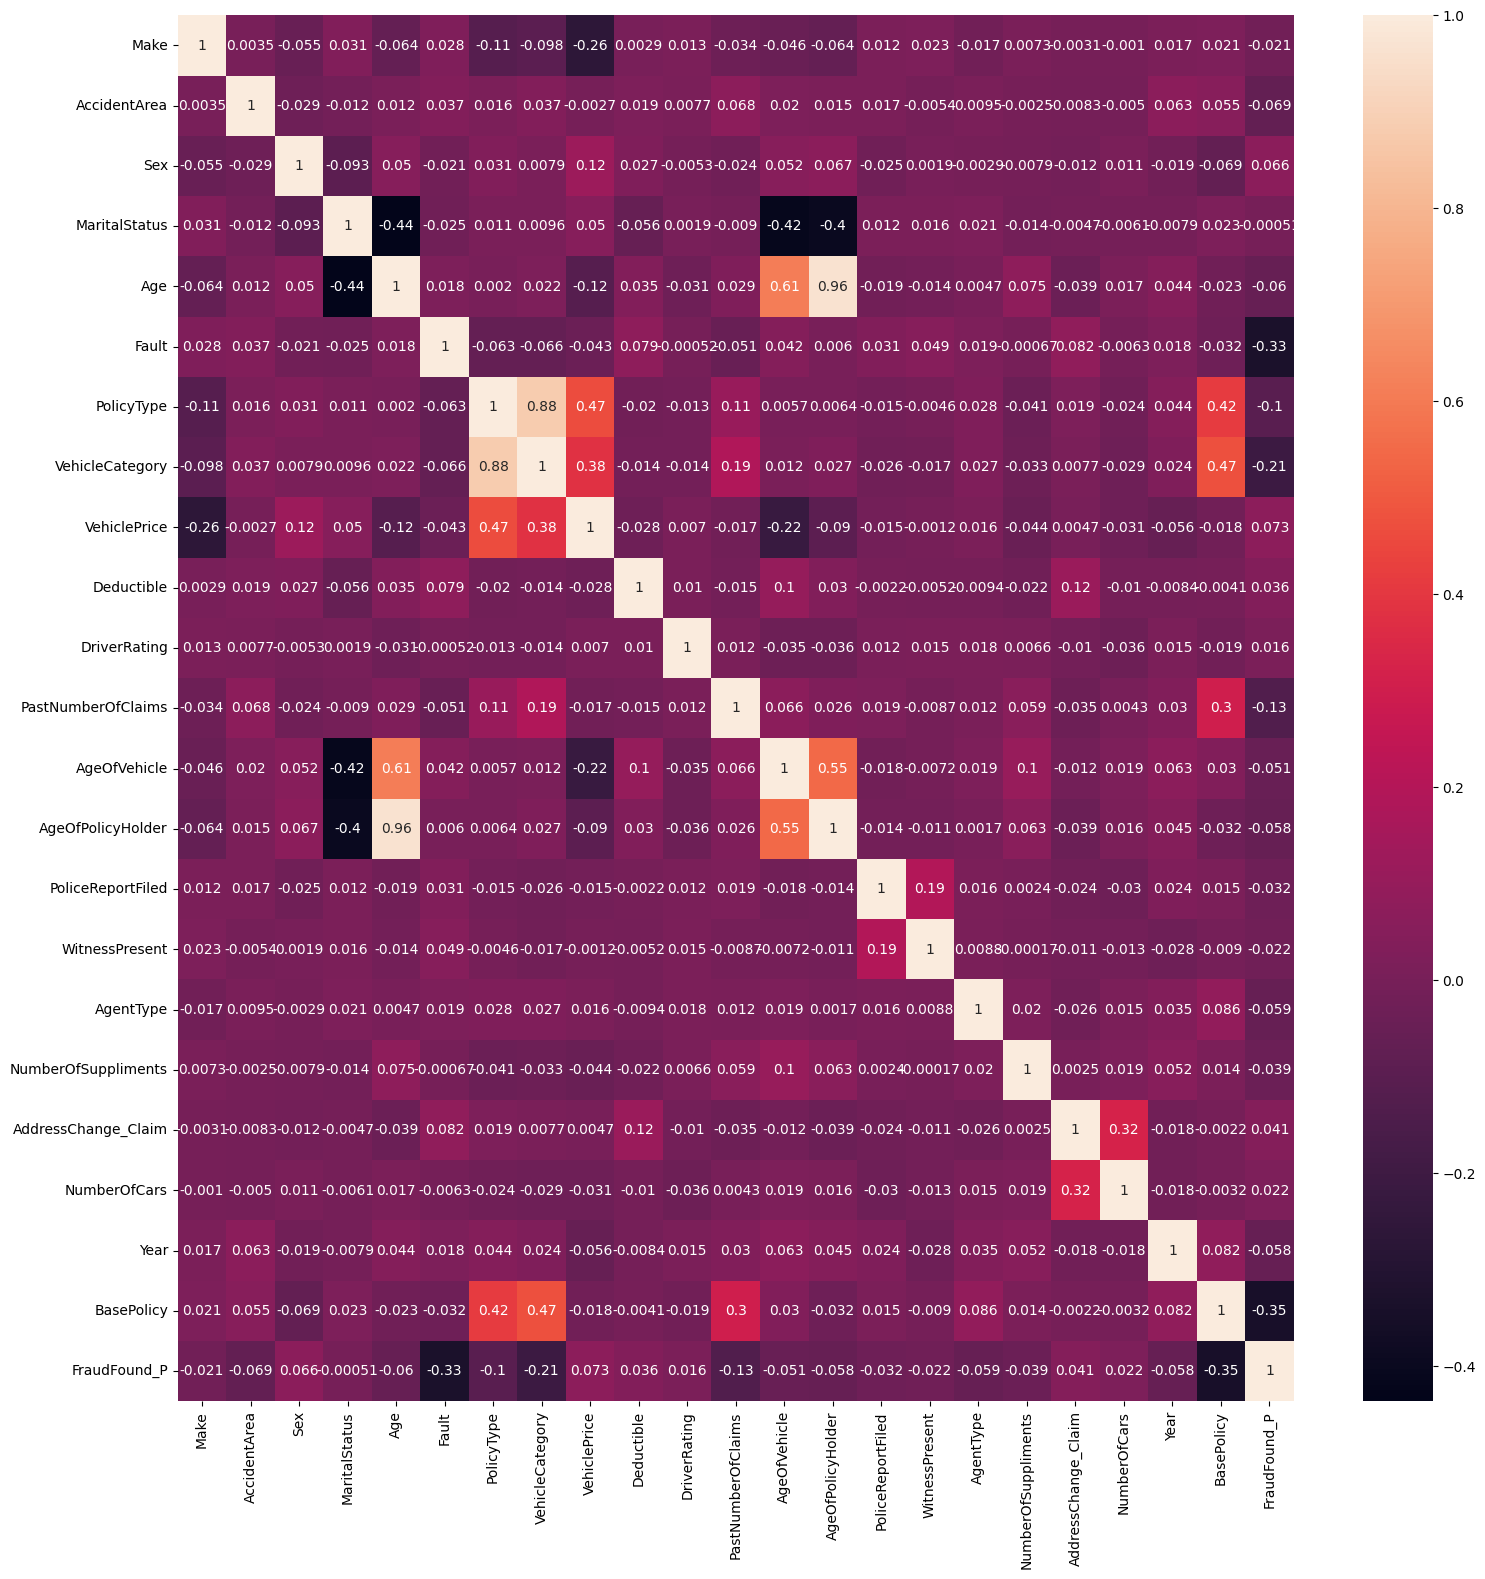

In [46]:
plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [42]:
df2.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Age', 'Fault',
       'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'FraudFound_P'],
      dtype='object')

In [47]:
df2.drop(['BasePolicy','Fault','PolicyType','PastNumberOfClaims','Year','NumberOfSuppliments','AgentType',
         'PastNumberOfClaims', 'AgeOfVehicle','AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
         'VehicleCategory','Make','AccidentArea'],axis='columns',inplace=True)

In [48]:
df2.head()

,Sex,MaritalStatus,Age,VehiclePrice,Deductible,DriverRating,AddressChange_Claim,NumberOfCars,FraudFound_P
13241,1,2,30,24500.0,400,3,0,1.0,1
6300,1,1,37,24500.0,400,1,48,2.0,1
13425,0,1,30,24500.0,400,1,0,1.0,1
7618,1,2,28,24500.0,400,1,0,1.0,1
2167,1,1,55,20000.0,400,2,0,1.0,1


In [49]:
x=df2.drop('FraudFound_P',axis='columns')
y=df2.FraudFound_P
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)
print(df2.shape)

(28994, 9)


In [50]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
model.score(x_test,y_test)
x_pred = np.array([[1,2,30,24500.0,400,3,0,1.0], [1, 1, 42, 20000.0, 400, 1, 0, 1.0]])
y_pred = model.predict(x_pred)
print(y_pred)

[1 0]


In [51]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
model1.score(x_test,y_test)

0.7992757371960683

In [54]:
x_test.iloc[:5]

,Sex,MaritalStatus,Age,VehiclePrice,Deductible,DriverRating,AddressChange_Claim,NumberOfCars
13231,1,0,46,24500.0,400,4,0,1.0
5518,1,1,26,24500.0,700,3,0,1.0
10850,1,1,28,24500.0,700,1,0,1.0
5627,1,1,43,24500.0,400,4,0,1.0
7682,1,1,46,34500.0,400,4,0,1.0
